In [ ]:
#%matplotlib notebook

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [25]:
import urllib.request
contents = urllib.request.urlopen("https://poloniex.com/public?command=returnTicker").read()

In [26]:
contents

b'{"BTC_BCN":{"id":7,"last":"0.00000011","lowestAsk":"0.00000012","highestBid":"0.00000011","percentChange":"0.10000000","baseVolume":"3.19255642","quoteVolume":"28808642.46240061","isFrozen":"0","high24hr":"0.00000012","low24hr":"0.00000010"},"BTC_BTS":{"id":14,"last":"0.00000687","lowestAsk":"0.00000690","highestBid":"0.00000685","percentChange":"0.00438596","baseVolume":"4.27812088","quoteVolume":"615585.26895635","isFrozen":"0","high24hr":"0.00000706","low24hr":"0.00000680"},"BTC_CLAM":{"id":20,"last":"0.00041706","lowestAsk":"0.00042593","highestBid":"0.00041705","percentChange":"-0.02540135","baseVolume":"1.45163474","quoteVolume":"3436.72313009","isFrozen":"0","high24hr":"0.00043761","low24hr":"0.00041416"},"BTC_DASH":{"id":24,"last":"0.01743448","lowestAsk":"0.01743448","highestBid":"0.01743445","percentChange":"-0.00050907","baseVolume":"58.34232025","quoteVolume":"3349.56446216","isFrozen":"0","high24hr":"0.01771975","low24hr":"0.01725165"},"BTC_DGB":{"id":25,"last":"0.000001

In [27]:
type(contents)

bytes

In [28]:
import json

In [29]:
json_string = json.dumps(str(contents))

In [30]:
json_string

'"b\'{\\"BTC_BCN\\":{\\"id\\":7,\\"last\\":\\"0.00000011\\",\\"lowestAsk\\":\\"0.00000012\\",\\"highestBid\\":\\"0.00000011\\",\\"percentChange\\":\\"0.10000000\\",\\"baseVolume\\":\\"3.19255642\\",\\"quoteVolume\\":\\"28808642.46240061\\",\\"isFrozen\\":\\"0\\",\\"high24hr\\":\\"0.00000012\\",\\"low24hr\\":\\"0.00000010\\"},\\"BTC_BTS\\":{\\"id\\":14,\\"last\\":\\"0.00000687\\",\\"lowestAsk\\":\\"0.00000690\\",\\"highestBid\\":\\"0.00000685\\",\\"percentChange\\":\\"0.00438596\\",\\"baseVolume\\":\\"4.27812088\\",\\"quoteVolume\\":\\"615585.26895635\\",\\"isFrozen\\":\\"0\\",\\"high24hr\\":\\"0.00000706\\",\\"low24hr\\":\\"0.00000680\\"},\\"BTC_CLAM\\":{\\"id\\":20,\\"last\\":\\"0.00041706\\",\\"lowestAsk\\":\\"0.00042593\\",\\"highestBid\\":\\"0.00041705\\",\\"percentChange\\":\\"-0.02540135\\",\\"baseVolume\\":\\"1.45163474\\",\\"quoteVolume\\":\\"3436.72313009\\",\\"isFrozen\\":\\"0\\",\\"high24hr\\":\\"0.00043761\\",\\"low24hr\\":\\"0.00041416\\"},\\"BTC_DASH\\":{\\"id\\":24,\\"la

In [31]:
print(str(contents)[1:-1])

'{"BTC_BCN":{"id":7,"last":"0.00000011","lowestAsk":"0.00000012","highestBid":"0.00000011","percentChange":"0.10000000","baseVolume":"3.19255642","quoteVolume":"28808642.46240061","isFrozen":"0","high24hr":"0.00000012","low24hr":"0.00000010"},"BTC_BTS":{"id":14,"last":"0.00000687","lowestAsk":"0.00000690","highestBid":"0.00000685","percentChange":"0.00438596","baseVolume":"4.27812088","quoteVolume":"615585.26895635","isFrozen":"0","high24hr":"0.00000706","low24hr":"0.00000680"},"BTC_CLAM":{"id":20,"last":"0.00041706","lowestAsk":"0.00042593","highestBid":"0.00041705","percentChange":"-0.02540135","baseVolume":"1.45163474","quoteVolume":"3436.72313009","isFrozen":"0","high24hr":"0.00043761","low24hr":"0.00041416"},"BTC_DASH":{"id":24,"last":"0.01743448","lowestAsk":"0.01743448","highestBid":"0.01743445","percentChange":"-0.00050907","baseVolume":"58.34232025","quoteVolume":"3349.56446216","isFrozen":"0","high24hr":"0.01771975","low24hr":"0.01725165"},"BTC_DGB":{"id":25,"last":"0.0000017

In [32]:
print(dict(str(contents)[1:-1]))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [33]:
import requests

In [34]:
response = requests.get("https://poloniex.com/public?command=returnTicker")

In [35]:
response.text

'{"BTC_BCN":{"id":7,"last":"0.00000011","lowestAsk":"0.00000012","highestBid":"0.00000011","percentChange":"0.10000000","baseVolume":"3.19255642","quoteVolume":"28808642.46240061","isFrozen":"0","high24hr":"0.00000012","low24hr":"0.00000010"},"BTC_BTS":{"id":14,"last":"0.00000687","lowestAsk":"0.00000690","highestBid":"0.00000685","percentChange":"0.00438596","baseVolume":"4.27812088","quoteVolume":"615585.26895635","isFrozen":"0","high24hr":"0.00000706","low24hr":"0.00000680"},"BTC_CLAM":{"id":20,"last":"0.00041706","lowestAsk":"0.00042593","highestBid":"0.00041705","percentChange":"-0.02540135","baseVolume":"1.45163474","quoteVolume":"3436.72313009","isFrozen":"0","high24hr":"0.00043761","low24hr":"0.00041416"},"BTC_DASH":{"id":24,"last":"0.01743448","lowestAsk":"0.01743448","highestBid":"0.01743445","percentChange":"-0.00050907","baseVolume":"58.34232025","quoteVolume":"3349.56446216","isFrozen":"0","high24hr":"0.01771975","low24hr":"0.01725165"},"BTC_DGB":{"id":25,"last":"0.0000017

In [36]:
JSON_string = str(response.json())

In [37]:
dataset = pd.read_json("https://poloniex.com/public?command=returnTicker")

In [38]:
dataset

,BTC_BCN,BTC_BTS,BTC_CLAM,BTC_DASH,BTC_DGB,BTC_DOGE,BTC_GAME,BTC_LTC,BTC_MAID,BTC_OMNI,...,BTC_FOAM,USDC_FOAM,BTC_NMR,BTC_POLY,BTC_LPT,BTC_GRIN,USDC_GRIN,BTC_ATOM,USDC_ATOM,USDT_ATOM
baseVolume,3.192556e+00,4.278121,1.451635,58.342320,4.480484e+01,1.970046e+01,0.595770,250.444029,11.263796,0.076235,...,0.633096,2447.788084,0.688977,0.274247,3.409717,149.739217,241594.255698,55.504114,145362.882967,35919.258481
high24hr,1.200000e-07,0.000007,0.000438,0.017720,1.740000e-06,3.400000e-07,0.000010,0.015270,0.000019,0.000220,...,0.000005,0.047334,0.000997,0.000011,0.000770,0.000752,7.016001,0.000744,7.174466,6.789303
highestBid,1.100000e-07,0.000007,0.000417,0.017434,1.700000e-06,3.300000e-07,0.000010,0.014715,0.000019,0.000202,...,0.000005,0.046012,0.000859,0.000011,0.000753,0.000641,5.947840,0.000713,6.605003,6.598560
id,7.000000e+00,14.000000,20.000000,24.000000,2.500000e+01,2.700000e+01,38.000000,50.000000,51.000000,58.000000,...,246.000000,247.000000,248.000000,249.000000,250.000000,251.000000,252.000000,253.000000,254.000000,255.000000
isFrozen,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
last,1.100000e-07,0.000007,0.000417,0.017434,1.700000e-06,3.300000e-07,0.000010,0.014720,0.000019,0.000201,...,0.000005,0.046500,0.000912,0.000011,0.000753,0.000648,5.947842,0.000713,6.700000,6.661055
low24hr,1.000000e-07,0.000007,0.000414,0.017252,1.430000e-06,3.300000e-07,0.000009,0.014577,0.000017,0.000201,...,0.000005,0.045930,0.000779,0.000011,0.000725,0.000600,5.500000,0.000712,6.552632,6.555584
lowestAsk,1.200000e-07,0.000007,0.000426,0.017434,1.710000e-06,3.400000e-07,0.000010,0.014739,0.000019,0.000217,...,0.000005,0.047334,0.000912,0.000011,0.000764,0.000654,6.118000,0.000717,6.699999,6.661054
percentChange,1.000000e-01,0.004386,-0.025401,-0.000509,1.724138e-01,-2.941176e-02,0.044633,-0.013451,0.064368,-0.042381,...,-0.009671,-0.021053,0.000154,-0.008483,-0.006452,0.067934,0.069756,-0.011473,0.022490,0.013639
quoteVolume,2.880864e+07,615585.268956,3436.723130,3349.564462,2.865889e+07,5.938663e+07,61381.119757,16689.245476,622260.658415,357.181209,...,125326.810879,52981.674034,740.344294,25767.001557,4492.519502,226834.392279,39467.969660,76338.463716,21576.960260,5385.340493


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [25]:
import urllib.request
contents = urllib.request.urlopen("https://poloniex.com/public?command=returnTicker").read()

In [39]:
df = pd.read_json("https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XMR&start=1546300800&end=1546646400&period=14400")

In [40]:
df

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.012247,2019-01-01 00:00:00,0.012322,0.012105,0.012274,938.529995,11.474740,0.012226
1,0.012231,2019-01-01 04:00:00,0.012358,0.012180,0.012254,567.594243,6.965434,0.012272
2,0.012283,2019-01-01 08:00:00,0.012342,0.012173,0.012231,578.447085,7.109577,0.012291
3,0.012291,2019-01-01 12:00:00,0.012380,0.012249,0.012292,743.255280,9.145455,0.012305
4,0.012458,2019-01-01 16:00:00,0.012458,0.012252,0.012280,1696.310901,20.975012,0.012365
5,0.012495,2019-01-01 20:00:00,0.012648,0.012392,0.012429,2322.775597,29.140455,0.012546
6,0.012479,2019-01-02 00:00:00,0.012600,0.012432,0.012495,799.561053,10.031364,0.012546
7,0.012752,2019-01-02 04:00:00,0.012784,0.012479,0.012479,1564.669154,19.837235,0.012678
8,0.012760,2019-01-02 08:00:00,0.012865,0.012575,0.012752,4744.762680,60.399254,0.012730
9,0.013000,2019-01-02 12:00:00,0.013176,0.012693,0.012760,7678.080919,99.558344,0.012967


In [41]:
# ensuring only equity series is considered
# df = df.loc[df['Series'] == 'EQ']

In [42]:
# Converting date to pandas datetime format
df['Date']  = pd.to_datetime(df['date'])
df['SMA5']  = df["close"].rolling(20).mean()
df['SMA20'] = df["close"].rolling(100).mean()

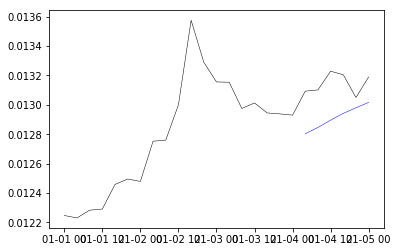

In [43]:
#Using matplotlib to add required columns
plt.plot(df['Date'], df['close'],linewidth=0.5,color='black')
plt.plot(df['Date'], df['SMA5'],linewidth=0.5,color='blue')
plt.plot(df['Date'], df['SMA20'],linewidth=0.5,color='c')

In [44]:
df['SMA5']		=df['SMA5'].fillna(0)
df['SMA20']		=df['SMA20'].fillna(0)

In [45]:
#Identifying the buy/sell zone
df['Buy'] = np.where( (df['SMA5']> df['SMA20']), 1, 0)
df['Sell'] = np.where( (df['SMA5']< df['SMA20']), 1, 0)

In [47]:
##identify buy sell signal
df['Buy_ind'] = np.where( (df['Buy'] > df['Buy'].shift(1)),1,0)
df['Sell_ind'] = np.where( (df['Sell'] > df['Sell'].shift(1)),1,0)
# print(df.dtypes)
# print(df.head(20))

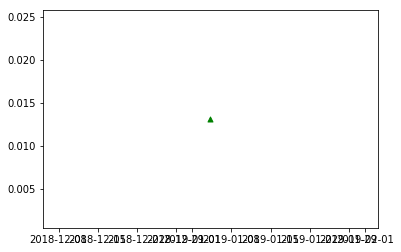

In [49]:
## plotting the buy and sellsignals on graph
plt.scatter(df.loc[df['Buy_ind'] ==1 , 'date'].values,df.loc[df['Buy_ind'] ==1, 'close'].values, label='skitscat', color='green', s=25, marker="^")
plt.scatter(df.loc[df['Sell_ind'] ==1 , 'date'].values,df.loc[df['Sell_ind'] ==1, 'close'].values, label='skitscat', color='red', s=25, marker="v")

Text(0.5, 1.0, 'HDFC stock price with buy and sell signal')

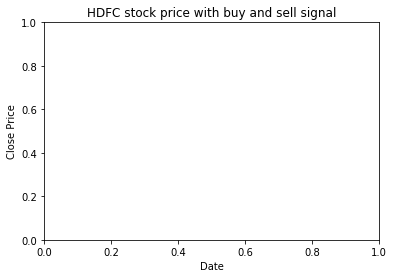

In [50]:
## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('HDFC stock price with buy and sell signal') 